# Recurrent Neural Network





## Resources

- RNN-LSTM : https://colah.github.io/posts/2015-08-Understanding-LSTMs/
- LSTM : https://en.wikipedia.org/wiki/Long_short-term_memory

## Part 1 - Data Preprocessing



In [7]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# Importing the training set

dataset_train = pd.read_csv('Google_train.csv')
training_set = dataset_train.iloc[:,0:].values

In [9]:
training_set

array([[1.51532028e+02, 1.54919327e+02, 1.50739990e+02, 1.53250580e+02,
        5.79510000e+06],
       [1.53723801e+02, 1.60309128e+02, 1.52179596e+02, 1.60060059e+02,
        7.24800000e+06],
       [1.59900650e+02, 1.65001541e+02, 1.56911850e+02, 1.63412491e+02,
        9.81450000e+06],
       ...,
       [1.14398999e+03, 1.14733997e+03, 1.13878003e+03, 1.14490002e+03,
        8.64000000e+05],
       [1.14685999e+03, 1.15081995e+03, 1.13940002e+03, 1.15033997e+03,
        9.03800000e+05],
       [1.14600000e+03, 1.15857996e+03, 1.14500000e+03, 1.15357996e+03,
        1.23880000e+06]])

### Feature Scaling

- Feature Scaling in done so that all values are in same range, columns with higher values than other features like volumne may be given higher importance in neural network creating a biased network. 
- Hence it is important to bring all feautres to same scale

In [10]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating training set

- Training set will contain 5 inputs and 5 outputs, not predicting volume.
- RNN requires stack data i.e memory of data needs to passed. For training ith value in RNN with n time steps, all previous all upto i-nth value needs to passed.

In [11]:
# Creating a data structure with 120 Daysteps and 5 output

X_train = []
y_train = []
for i in range(120, 2425):
    X_train.append(training_set_scaled[i-120:i])
    y_train.append(training_set_scaled[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))

## Part 2 - Building the RNN


In [12]:
# Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 75, return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 75, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 75, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 75))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 5))

In [14]:
# Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
73/73 [==============================] - 14s 127ms/step - loss: 0.0360
Epoch 2/100
73/73 [==============================] - 9s 127ms/step - loss: 0.0054
Epoch 3/100
73/73 [==============================] - 10s 133ms/step - loss: 0.0062
Epoch 4/100
73/73 [==============================] - 10s 131ms/step - loss: 0.0041
Epoch 5/100
73/73 [==============================] - 10s 136ms/step - loss: 0.0037
Epoch 6/100
73/73 [==============================] - 10s 134ms/step - loss: 0.0031
Epoch 7/100
73/73 [==============================] - 10s 144ms/step - loss: 0.0028
Epoch 8/100
73/73 [==============================] - 10s 139ms/step - loss: 0.0030
Epoch 9/100
73/73 [==============================] - 10s 139ms/step - loss: 0.0034
Epoch 10/100
73/73 [==============================] - 10s 135ms/step - loss: 0.0031
Epoch 11/100
73/73 [==============================] - 10s 135ms/step - loss: 0.0025
Epoch 12/100
73/73 [==============================] - 10s 136ms/step - loss: 0.0025
Ep

## Part 3 - Making the predictions and visualising the results

In [16]:
# Getting the real stock price from the test set

dataset_test = pd.read_csv('Google_test.csv')
real_stock_price = dataset_test.iloc[:, 0:].values

### Creating test dataset

- Since RNN requries stack data i.e memory data it is important that starting values of test data also have previous data, which is present in training data.
- A cumulative dataset is creating using training and test data, and using this dataset we are able to get memory for initial datapoints that are present in training set

In [17]:
# Creating dataset for prediction

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0, sort = False)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values
inputs = sc.transform(inputs)
X_test = []
for i in range(120, 160):
    X_test.append(inputs[i-120:i])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))

In [ ]:
# Making prediction

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Visualizing predictions

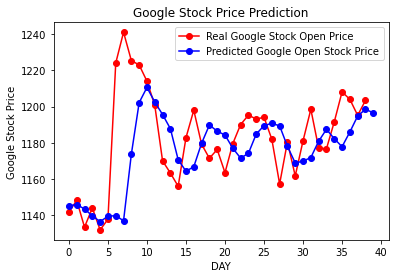

In [18]:
plt.plot(real_stock_price[1:,0], color = 'red', marker = 'o', label = 'Real Google Stock Open Price')
plt.plot(predicted_stock_price[:,0], color = 'blue', marker = 'o',label = 'Predicted Google Open Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('DAY')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

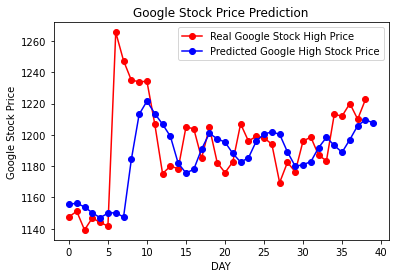

In [19]:
plt.plot(real_stock_price[1:,1], color = 'red', marker = 'o', label = 'Real Google Stock High Price')
plt.plot(predicted_stock_price[:,1], color = 'blue', marker = 'o',label = 'Predicted Google High Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('DAY')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

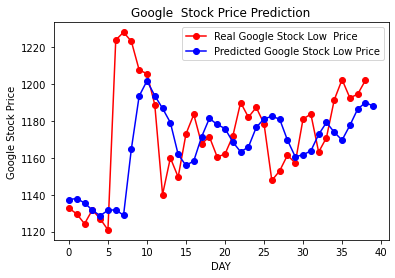

In [20]:
plt.plot(real_stock_price[1:,2], color = 'red',  marker = 'o',label = 'Real Google Stock Low  Price')
plt.plot(predicted_stock_price[:,2], color = 'blue', marker = 'o',label = 'Predicted Google Stock Low Price')
plt.title('Google  Stock Price Prediction')
plt.xlabel('DAY')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

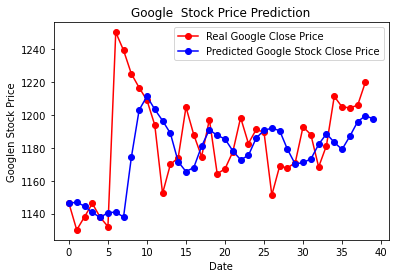

In [21]:
plt.plot(real_stock_price[1:,3], color = 'red', marker = 'o',label = 'Real Google Close Price')
plt.plot(predicted_stock_price[:,3], color = 'blue', marker = 'o',label = 'Predicted Google Stock Close Price')
plt.title('Google  Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Googlen Stock Price')
plt.legend()
plt.show()

In [22]:
# Saving Model

regressor.save("open.h5")